In [1]:
import numpy as np

In [8]:
def diag(v):
    D = np.zeros((len(v),len(v)))
    for i in range(len(v)):
        D[i,i] = v[i]
    return(D)

In [12]:
x = np.array([1,2,3,4,5,8])
np.matmul(diag(x)*diag(x))

array([[ 1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  9.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 16.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 25.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 64.]])

In [2]:
X = np.array([[64,580,29],[66,570,33],[68,590,37],[69,660,46],[73,600,55]])

## Covariance

In [3]:
def cov(a,b):
    n = len(a)
    mA = np.mean(a)
    mB = np.mean(b)
    c = 0
    for i in range(n):
        c = c + (a[i]-mA)*(b[i]-mB)
    return(c/(n-1))
    
def cov_matrix(X):
    k = len(X[0,:])
    S = np.zeros((k,k))
    for i in range(len(X[0,:])):
        for j in range(len(X[0,:])):
            S[i,j] = cov(X[:,i], X[:,j])
    return(S)
    

In [4]:
cov_matrix(X)

array([[  11.5 ,   50.  ,   34.75],
       [  50.  , 1250.  ,  205.  ],
       [  34.75,  205.  ,  110.  ]])

## Inference about Independence

In [5]:
X = np.array([[1,1],[1,0],[0,0],[1,0],[0,1],[1,1],[0,0],[1,0],[0,0],[1,1]])

# Ambitous Orthogonal Function Basis Project

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def inner_product(f,g,a=0,b=1, n=10000):
    x = np.array(range(n))/n
    step = (b-a)/n
    fxgx = f(x)*g(x)
    return(np.sum(fxgx*step))

def identity(x):
    return(x)

def cosj(j=1):
    if j==0:
        def c(x):
            return(1)
        return(c)
    else:
        def c(x,j=j):
            return(2**(.5)*np.cos(j*np.pi*x))
    return(c)

def doppler(x):
    return(((x*(1-x))**.5)*np.sin((2.1*np.pi)/(x+.05)))

def ortho_function_approx(f,x,basis = cosj, J=5, n = 10000):
    approx = x * 0
    for j in range(J):
        bas_f = basis(j=j)
        Bj = inner_product(f,bas_f, n=n)
        approx = approx + Bj*bas_f(x)
    return(approx)

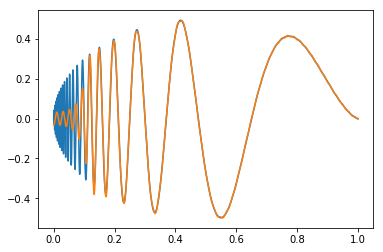

In [8]:
x = np.array(range(10000))/10000
dop_approx = ortho_function_approx(doppler,x,J=100)
plt.plot(x,doppler(x))
plt.plot(x,dop_approx)

### Importance Sampling

In [10]:
def normPdf(x,m,v):
    t = (x-m)/np.sqrt(v)
    return((1/((2*np.pi*v)**.5))*np.e**(-.5*t**2))

In [11]:
X = np.random.normal(4,1,10000)
h = X > 3
f = normPdf(X,0,1)
g = normPdf(X,4,1)
np.mean(f*h/g)

0.0013616888957046133